참고 URL :

* [Data Science FAQ | Kaggle](https://www.kaggle.com/rounakbanik/data-science-faq)

* [Novice to Grandmaster | Kaggle](https://www.kaggle.com/ash316/novice-to-grandmaster)

In [12]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

# Q11. 데이터사시언스 직업 선택에 가장 고려해야할 요소

In [13]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [14]:
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
job_factors = [
    x for x in mcq.columns if x.find('JobFactor') != -1]

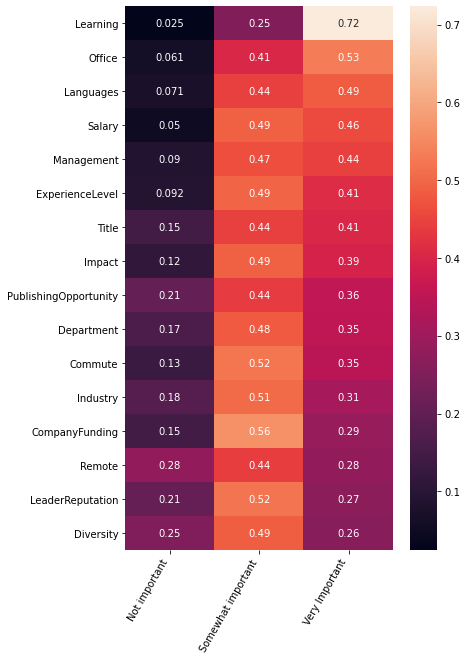

In [15]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
plt.xticks(rotation=60, ha='right')
sns.heatmap(jfdf.sort_values('Very Important', 
                             ascending=False), annot=True)

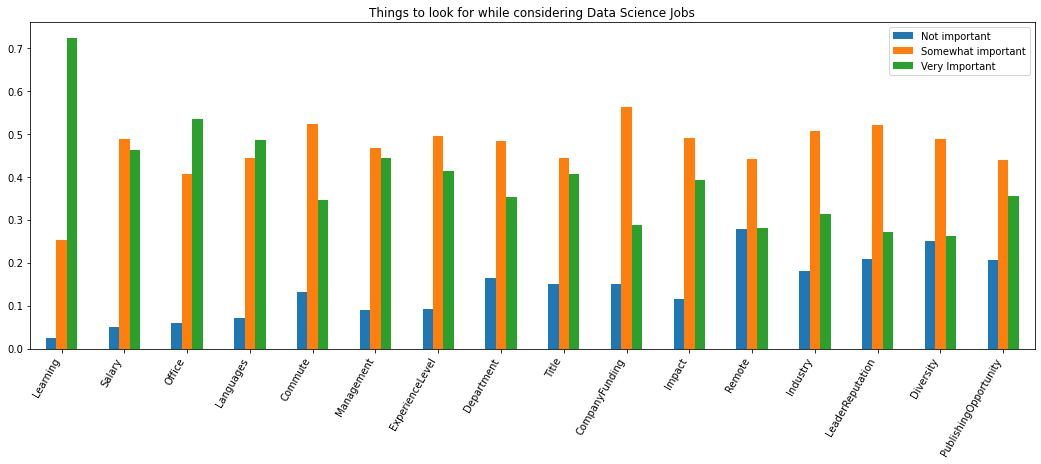

In [16]:
jfdf.plot(kind='bar', figsize=(18,6), 
          title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()

직업 선택 시, 가장 고려할 요소는 <br>
1위 = 배울 수 있는 곳인지 <br>
2위 = 사무실 근무환경 <br>
3위 = 프레임워크 or 언어 <br>
언어, 급여, 경영상태, 경력정도 순

# Q12. 데이터 사이언티스트에게 학위의 중요성

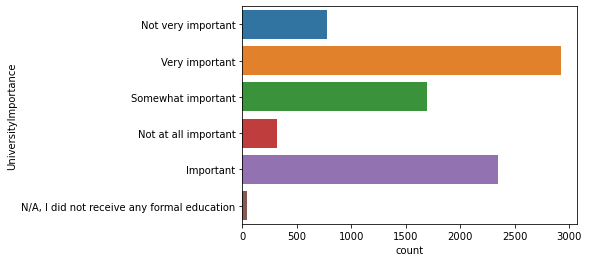

In [17]:
sns.countplot(y='UniversityImportance', data=mcq)

In [18]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & \
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(top_uni_dist,group_labels)
py.iplot(fig, filename='University Importance by Age')

20 ~ 30대 = 대학 학위가 중요 <br>
연령대가 높은 응답자 = 학위는 중요치 않다 <br>
학위가 중요치 않다고 응답한 사람들은 300명 미만 <br>
대부분 응답자가 석/박사인 것을 고려해 봤을 때 자연스러운 응답

# Q13. 어디서부터 데이터 사이언스를 시작할지

In [19]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

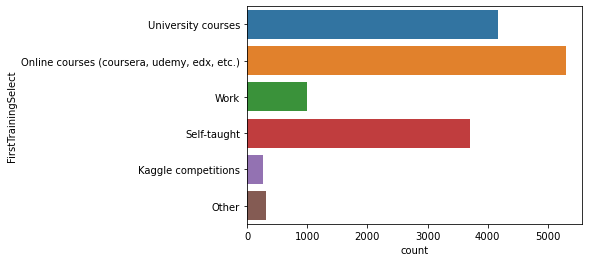

In [20]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

1위 = Coursera, udemy와 같은 온라인 코스 <br>
2위 = 대학 교육 <br>
3위 = 개인 프로젝트와 같은 자기주도 학습

# Q14. 데이터 사이어티스트 이력서에 가장 중요한 것

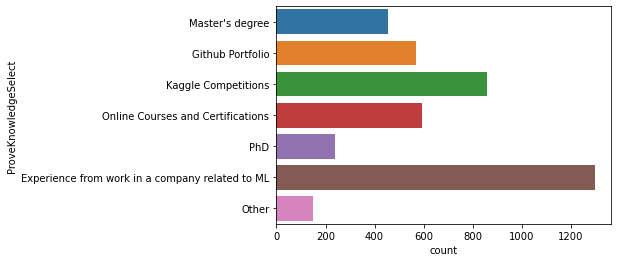

In [21]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

1위 = 머신러닝과 관련된 직무경험 <br>
2위 = 캐글 결과 <br>
온라인 강좌 수료증, 깃헙 포트폴리오 순

# Q15 머신러닝 알고리즘을 사용하기 위한 수학의 필요성

scikit과 같은 라이브러리는 세부 정보를 추상화하여 기본 기술을 몰라도 ML모델을 프로그래밍 가능 <Br>
그럼에도 수학은 중요한가?

In [22]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [23]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

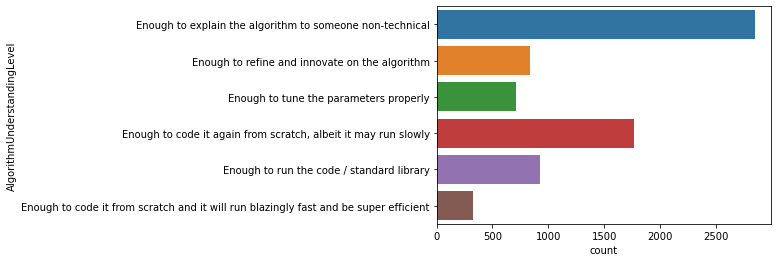

In [24]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

응답자 = 코딩 업무를 하는 사람 <br>
1위 = 기술과 관련 없는 사람에게 설명할 수 있는 정도라면 충분<br>
2위 = 더디더라도 밑바닥부터 다시 코딩해 볼 수 있는게 중요

# Q16. 어디서 일을 찾을까?

In [25]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
question.loc[question[
    'Column'].str.contains(
    'JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


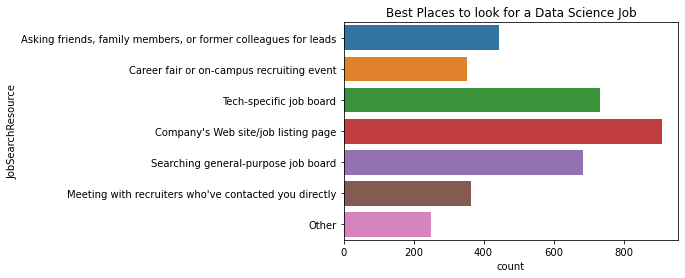

In [26]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

구직자들은 회사 웹사이트, 구직사이트로부터 찾고 <br>
특정 기술의 채용 게시판, 일반 채용 게시판, 친구나 가족, 이전 직장 동료나 리더를 통해 채용정보 획득

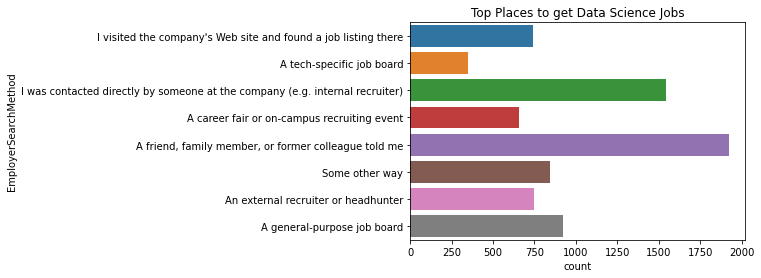

In [27]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

채용자는 친구, 가족, 이전 직장 동료의 추천으로 대부분 채용 <br>
리쿠르터나 특정 회사에 소속된 사람에게 직접 연락을 해서 구하는 비율이 높음

## 한국 사람들은?

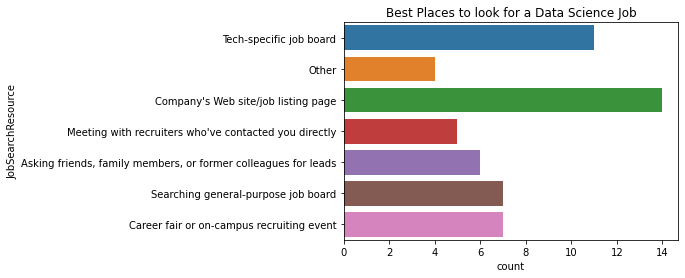

In [28]:
korea = mcq.loc[(mcq['Country']=='South Korea')]
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=korea)

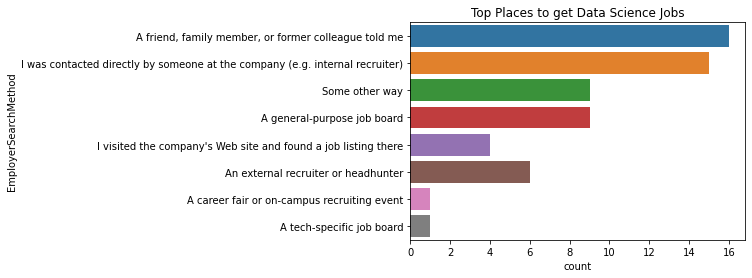

In [29]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)

# 결론

* 이 설문결과로 Python이 R보다 훨씬 많이 사용됨을 알 수 있었다.
* 하지만 Python과 R을 모두 사용하는 사람도 많다.
* 데이터 수집과 정제는 어려운 일이다.(공감)
* 인기있는 학습플랫폼과 블로그, 유튜브 채널, 팟캐스트 등을 알게 되었다.
* 내년에 인기있는 기술로는 딥러닝과 텐서플로우가 큰 차지를 할 것이다.